In [1]:
from data_extraction import *
from visualize import *
from calculate_error import *
import matplotlib.pyplot as plt
import numpy as np

## Block Sample

In [2]:
# Get data corresponding to the block
gt = get_ground_truth_data_list('test_data/Block_clear_joints.csv')
data = get_recorded_data_list('test_data/2024-07-24-test_20240724_113055.json', 6074, 53)

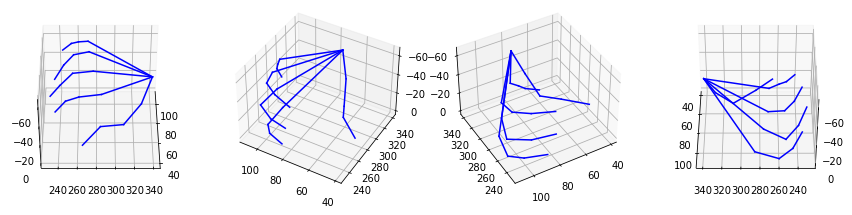

In [3]:
visualize_hand(gt[0])

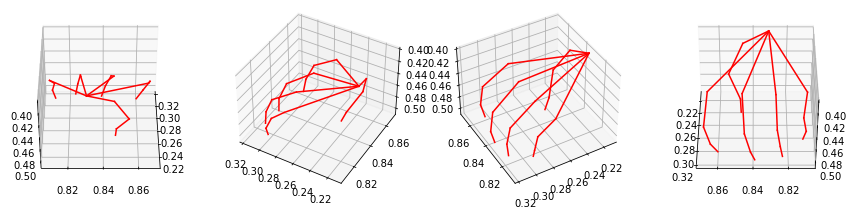

In [4]:
visualize_hand(data[0], 'r')

max hand avg diff:	28.86
min hand avg diff:	9.29
avg hand avg diff:	16.38
overall max diff: 	108.6
overall min diff: 	0.02


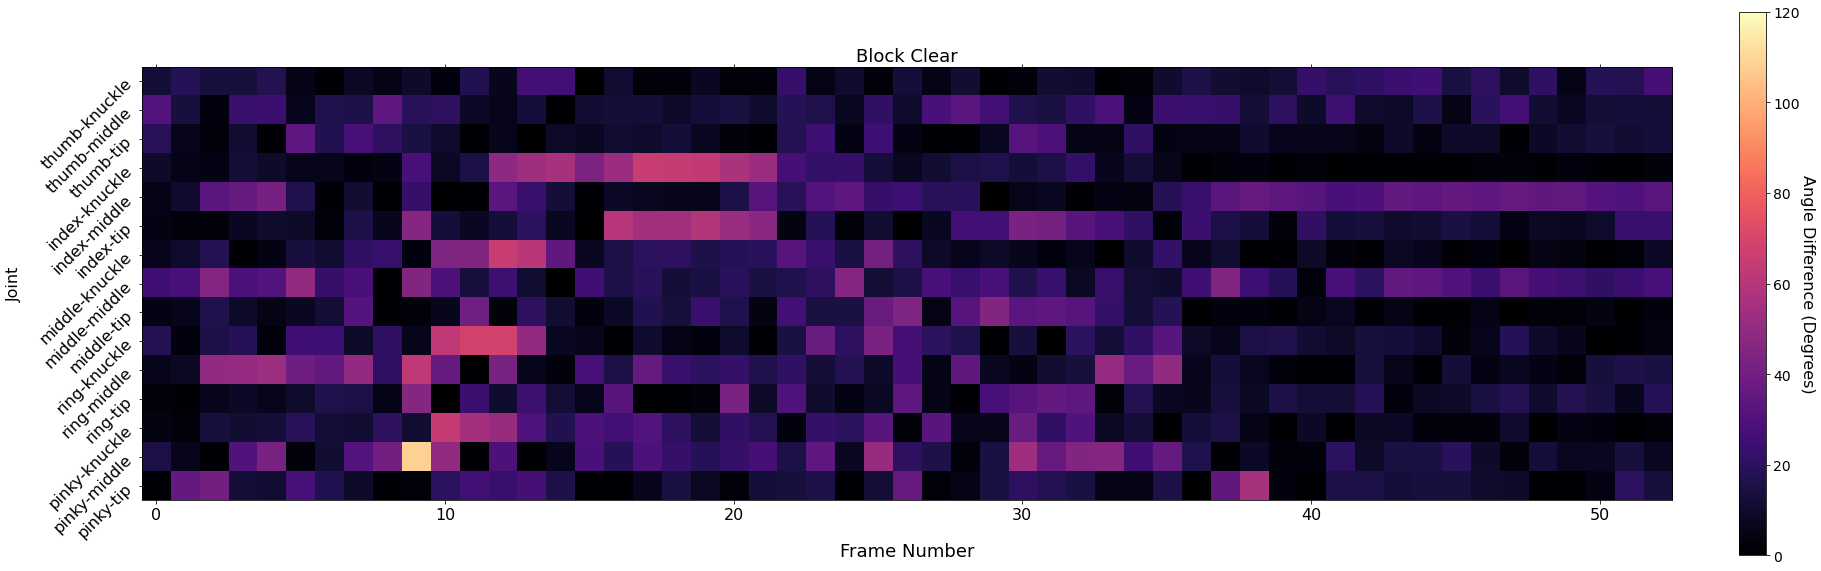

In [21]:
avg_diffs = []
angle_diffs = []
for i in range(len(gt)):
    avg_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[0])
    angle_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[1])
A = np.array(angle_diffs)

print(f"max hand avg diff:\t{round(max(avg_diffs), 2)}")
print(f"min hand avg diff:\t{round(min(avg_diffs), 2)}")
print(f"avg hand avg diff:\t{round(sum(avg_diffs)/len(avg_diffs), 2)}")
print(f"overall max diff: \t{round(A.max(), 2)}")
print(f"overall min diff: \t{round(A.min(), 2)}")

norm = mcolors.Normalize(vmin=0, vmax=120)
view_diff_matrix(A, "Block Clear", 'magma', norm)

## No object

In [22]:
# Get data corresponding to the block
gt = get_ground_truth_data_list('test_data/No_object_joints.csv')
data = get_recorded_data_list('test_data/2024-07-24-test_20240724_113055.json', 6409, 46)

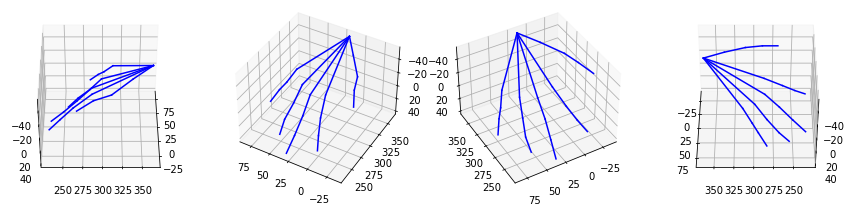

In [23]:
visualize_hand(gt[0])

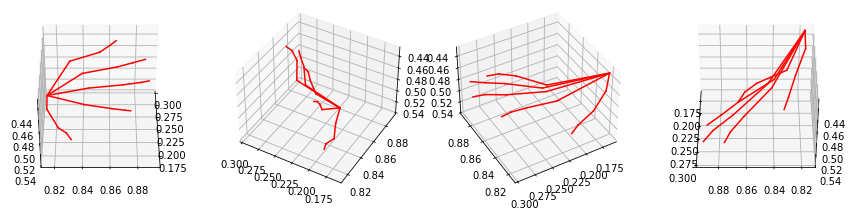

In [24]:
visualize_hand(data[0], 'r')

max hand avg diff:	57.37
min hand avg diff:	3.89
avg hand avg diff:	11.49
overall max diff: 	128.42
overall min diff: 	0.0


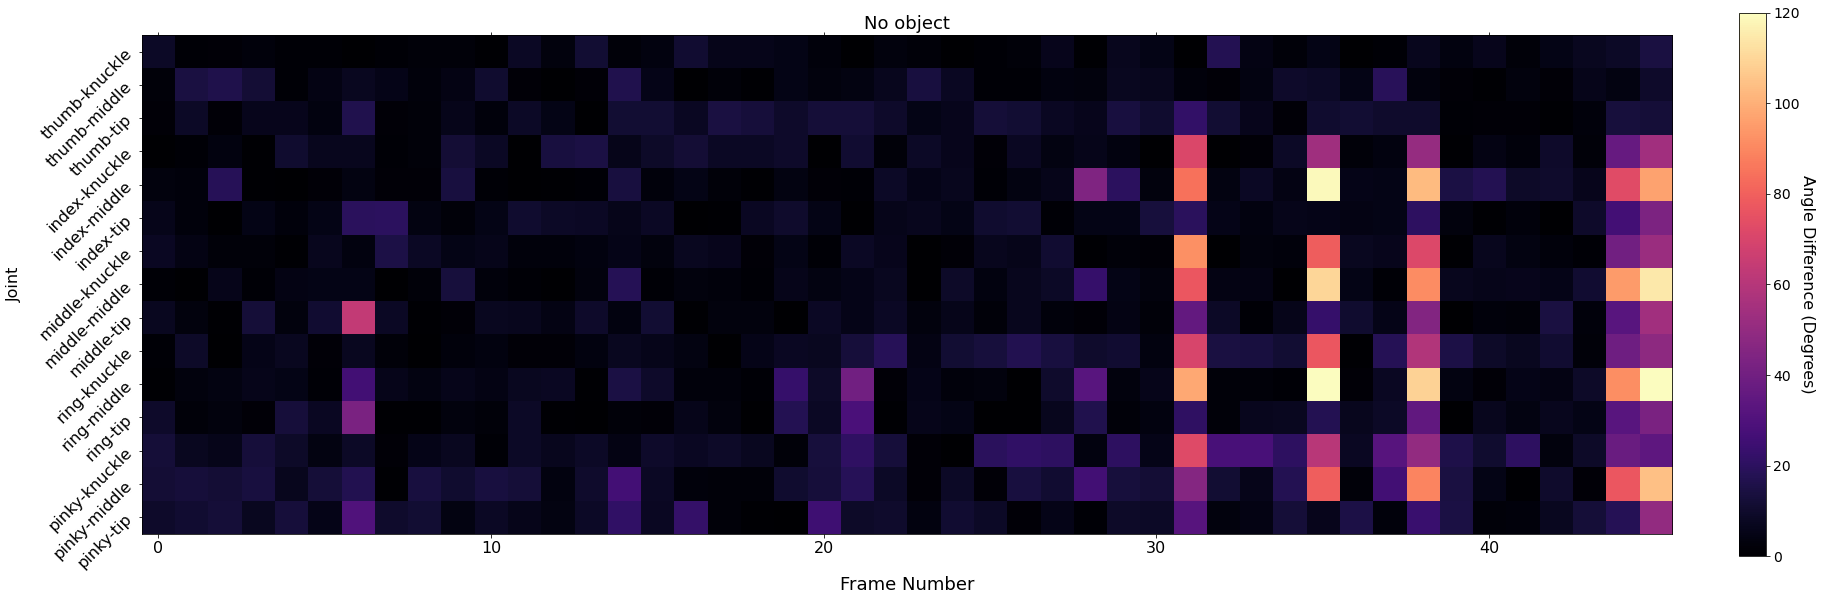

In [26]:
avg_diffs = []
angle_diffs = []
for i in range(len(gt)):
    avg_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[0])
    angle_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[1])
A = np.array(angle_diffs)

print(f"max hand avg diff:\t{round(max(avg_diffs), 2)}")
print(f"min hand avg diff:\t{round(min(avg_diffs), 2)}")
print(f"avg hand avg diff:\t{round(sum(avg_diffs)/len(avg_diffs), 2)}")
print(f"overall max diff: \t{round(A.max(), 2)}")
print(f"overall min diff: \t{round(A.min(), 2)}")

norm = mcolors.Normalize(vmin=0, vmax=120)
view_diff_matrix(A, "No object", 'magma', norm)